Tiana Randriamaro <br>
Problem Set 7

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from numpy import *
import statsmodels.api as sm
from numpy.linalg import inv
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
import os
#cwd = os.getcwd()

## Problem 1

The model is 
$$ Y_i = \beta_0 + \beta_1 T_i + \mu_i + \xi_i $$

with
 -  $\xi_i$ independent of everything else in the model and mean $0$
 -  $\mu_i$ is $0$ with probability $0.5$ and $1$ with probability $0.5$
 -  a variable $X_i = \frac{1}{2}\mu_i + \nu_i$ where $\nu_i$ independent of everything else in the model and uniformly distributed on $[0,1]$
 - $T_i$ is binary and determined as follows
    -  When $X_i < x^*$ and $\mu_i=0$ then $Pr(T_i=1)=0$
    -  When $X_i \geq x^*$ and $\mu_i=0$ then $Pr(T_i=1)=p_0$
    -  When $X_i < x^*$ and $\mu_i=1$ then $Pr(T_i=1)=0$
    -  When $X_i \geq x^*$ and $\mu_i=1$ then $Pr(T_i=1)=p_1$
 - $X_i,T_i,Y_i$ are observed and assuming $\frac{1}{2}<x^*<1$

### Plim of $\hat{\beta}_1$ where $\hat{\beta}_1$ is the OLS estimator of the coefficient on $T_i$ in a regression of $Y_i$ on $T_i$

Given the conditions on the treatment, $T_i = 0$ when $x_i<x*$ no matter what the value of $\mu_i$ is so $Pr(T_i = 1 | x_i<x^*,\mu_i) = 0$.<br><br>
$T_i$ is 1 when $x_i \geq x^*$ with
$ Pr(T_i=1 |x_i \geq x*, \mu_i = 0) = p_0 $ and 
$ Pr(T_i=1 |x_i \geq x*, \mu_i = 1) = p_1 $ <br><br>
As the OLS estimator coefficient on $T_i$, $\hat{\beta}_1 = (T_i'T_i)^{-1}(T_i'Y_i)$. Hence, <br><br>
$$plim(\hat{\beta}_1) =plim((T_i'T_i)^{-1}(T_i'Y_i))= \beta_1 + plim((T_i'T_i)^{-1}(T_i'\mu_i)) \neq \beta_1 \quad not \quad consistent \quad since$$
<br>
$E[\mu_i]=\frac{1}{2} \neq 0$ and $E[\mu_i | T_i=1] = \frac{1}{2}p_0 + \frac{1}{2} p_1 \neq 0$ <br><br>
Alternatively, $\beta_1$ is also the treatment effect so its estimate can be found by differencing the means of $Y$ such that $\hat{\beta}_1 = \overline{Y}_{treated} - \overline{Y}_{untreated}$.<br>
Hence, $plim(\hat{\beta}_1) = plim(\overline{Y}_{treated}) - plim(\overline{Y}_{untreated})$ <br>
where $\overline{Y}_{treated}$ is the mean when $T_i=1$ and $\overline{Y}_{untreated}$ is the mean when $T_i=0$.<br><br>
By the Law of Large Numbers, the sample average converges to the expected value so $$plim(\hat{\beta}_1) = \mu_{Y_{treated}} - \mu_{Y_{untreated}}$$

### Methodology to get a consistent estimate of $\beta_1$ and sketch of identification

We can estimate $x^*$ by finding the lowest $X_i$ with $T_i=1$ that is $X_i \geq x^*$, which would be the closest or equal to $x^*$. For identification, we need to find $p_0$ and $p_1$, which can be done by calculating the $Pr(T_i=1)$ using the subset of data that have $T_i=1$ and the $Pr(T_i=0)=1-Pr(T_i=1)$. So two unknowns, $p_0,p_1$, with two equations for $Pr(T_i=1),Pr(T_i=0)$.

## Problem 2

Using the dataset "" where $X$ is and $Y$ is. Placebo treatment $T_i$ such that $T_i=1$ when $X_i>x^*$ for some $x^*$. <br>
Estimating the model by regression discontinuity in several ways (kernel estimation, local linear regression, and polynomial regression)
$$ Y_i = \beta_0 + \alpha T_i + \mu_i $$

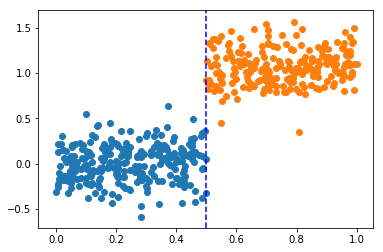

In [375]:
# Generating the data
x = np.random.uniform(0,1,500)
mu = 0.2*np.random.randn(1,500)
y = np.sin(x/10) + np.square(x/50) + mu
y = y.T
left_y = y[np.where(x<0.5)]
right_y = y[np.where(x>0.5)]+1
ly = left_y.flatten()
ry = right_y.flatten()
lx = x[x<0.5]
rx = x[x>0.5]
plt.scatter(lx,ly)
plt.scatter(rx,ry)
plt.axvline(x=0.5, color="b",linestyle="--")

# Kernel estimation

In [237]:
# Three different bandwidths
h1 = 0.1
h2 = 0.05
h3 = 0.01

In [376]:
x = np.asmatrix(np.random.uniform(0,1,500))
xy = np.concatenate([x.T,y], axis=1)
data = pd.DataFrame(xy,columns=['x','y'])

In [377]:
# Discontinuity is at x=0.5 
# changing the maximum of x to equal 0.5
# to estimate treatment effect
treat_loc = np.where(data['x'] == max(data['x']))
data['x'][np.asscalar(treat_loc[0])] = 0.5

In [379]:
# Creating the kernels for upper and lower 
data['kernelU'] = np.where((data['x']>0.5) & (data['x']<0.5+h1), 1, 0)
data['kernelL'] = np.where((data['x']<0.5) & (data['x']>0.5-h1), 1, 0)
data['kernel2U'] = np.where((data['x']>0.5) & (data['x']<0.5+h2), 1, 0)
data['kernel2L'] = np.where((data['x']<0.5) & (data['x']>0.5-h2), 1, 0)
data['kernel3U'] = np.where((data['x']>0.5) & (data['x']<0.5+h3), 1, 0)
data['kernel3L'] = np.where((data['x']<0.5) & (data['x']>0.5-h3), 1, 0)

Estimation with bandwidth $h1=0.1$

In [380]:
X = sm.add_constant(data['kernelU'])
wls_model = sm.OLS(data['y'],X)
results = wls_model.fit()
predU = results.predict()

In [381]:
X = sm.add_constant(data['kernelL'])
wls_model = sm.OLS(data['y'],X)
results = wls_model.fit()
predL = results.predict()

In [382]:
estim = predU - predL
print("The treatment effect is",round(sum(estim),3))

The treatment effect is -0.0


Estimation with bandwidth $h2=0.05$

In [383]:
X = sm.add_constant(data['kernel2U'])
wls_model = sm.OLS(data['y'],X)
results = wls_model.fit()
predU = results.predict()

In [384]:
X = sm.add_constant(data['kernel2L'])
wls_model = sm.OLS(data['y'],X)
results = wls_model.fit()
predL = results.predict()

In [385]:
estim = predU - predL
print("The treatment effect is",round(sum(estim),3))

The treatment effect is 0.0


Estimation with bandwidth $h3 = 0.01$

In [386]:
X = sm.add_constant(data['kernel3U'])
wls_model = sm.OLS(data['y'],X)
results = wls_model.fit()
predU = results.predict()

In [387]:
X = sm.add_constant(data['kernel3L'])
wls_model = sm.OLS(data['y'],X)
results = wls_model.fit()
predL = results.predict()

In [388]:
estim = predU - predL
print("The treatment effect is",round(sum(estim),3))

The treatment effect is 0.0


The treatment effect from the kernel estimation is 0 at the three different bandwidths.

# Local Linear Regression estimation

Estimation with bandwidth $h1= 0.1$

In [389]:
X = sm.add_constant(data['x'])
wls_model = sm.WLS(data['y'],X, weights=data['kernelU'])
results = wls_model.fit()
predU = results.predict()

In [390]:
wls_model = sm.WLS(data['y'],X, weights=data['kernelL'])
results = wls_model.fit()
predL = results.predict()

In [391]:
estim = predU - predL
#avg_estim = mean(estim)
#print("The average treatment effect is",round(avg_estim,3))

In [392]:
print("The effect at the index where x = 0.5 is =",round(estim[np.asscalar(treat_loc[0])]))

The effect at the index where x = 0.5 is = -0.0


Estimation with bandwidth $h2= 0.05$

In [393]:
X = sm.add_constant(data['x'])
wls_model = sm.WLS(data['y'],X, weights=data['kernel2U'])
results = wls_model.fit()
predU = results.predict()

In [394]:
wls_model = sm.WLS(data['y'],X, weights=data['kernel2L'])
results = wls_model.fit()
predL = results.predict()

In [395]:
estim = predU - predL
#avg_estim = mean(estim)
#print("The average treatment effect is",round(avg_estim,3))

In [396]:
print("The effect at the index where x = 0.5 is = ",round(estim[np.asscalar(treat_loc[0])]))

The effect at the index where x = 0.5 is =  -0.0


Estimation with bandwidth $h3= 0.01$

In [397]:
X = sm.add_constant(data['x'])
wls_model = sm.WLS(data['y'],X, weights=data['kernel3U'])
results = wls_model.fit()
predU = results.predict()

In [398]:
wls_model = sm.WLS(data['y'],X, weights=data['kernel3L'])
results = wls_model.fit()
predL = results.predict()

In [399]:
estim = predU - predL
#avg_estim = mean(estim)
#print("The average treatment effect is",round(avg_estim,3))

In [400]:
print("The effect at the index where x = 0.5 is = ",round(estim[np.asscalar(treat_loc[0])]))

The effect at the index where x = 0.5 is =  0.0


The local linear regression estimation also leads to treatment effect of 0.

# Multinomial Regression estimation

In [401]:
data['x2']= np.multiply(data['x'],data['x'])
data['x3']= np.multiply(data['x'],data['x2'])
data['x4']= np.multiply(data['x'],data['x3'])
data['x5']= np.multiply(data['x'],data['x4'])
data['x6']= np.multiply(data['x'],data['x5'])
data['x7']= np.multiply(data['x'],data['x6'])
data['x8']= np.multiply(data['x'],data['x7'])

In [402]:
data['T'] = np.where(data['x'] > 0.5, 1, 0)

In [403]:
data['xup'] = np.multiply((data['x']-0.5),data['T'])
data['xup2'] = np.multiply(data['xup'],data['xup'])
data['xup3'] = np.multiply(data['xup2'],data['xup'])
data['xup4'] = np.multiply(data['xup3'],data['xup'])
data['xup5'] = np.multiply(data['xup4'],data['xup'])
data['xup6'] = np.multiply(data['xup5'],data['xup'])
data['xup7'] = np.multiply(data['xup6'],data['xup'])
data['xup8'] = np.multiply(data['xup7'],data['xup'])

In [404]:
# OLS on T and x
exog = ['T','x']
X = sm.add_constant(data[exog])
reg1 = sm.OLS(data['y'],X).fit()

In [405]:
# OLS on T, x, x2, x3
exog = ['T','x','x2','x3']
X = sm.add_constant(data[exog])
reg2 = sm.OLS(data['y'],X).fit()

In [406]:
# OLS on T, x, xup
exog = ['T','x','xup']
X = sm.add_constant(data[exog])
reg3 = sm.OLS(data['y'],X).fit()

In [407]:
# OLS on T,x,x2,x3,x4,xup,xup2,xup3,xup4
exog = ['T','x','x2','x3','xup','xup2','xup3','xup4']
X = sm.add_constant(data[exog])
reg4 = sm.OLS(data['y'],X).fit()

In [408]:
# OLS on T,x,x2,x3,x4,xup,xup2,xup3,xup4
exog = ['T','x','x2','x3','x4','x5','x6','x7','x8',
        'xup','xup2','xup3','xup4','xup5','xup6',
        'xup7','xup8']
X = sm.add_constant(data[exog])
reg5 = sm.OLS(data['y'],X).fit()

In [409]:
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
           'No. observations' : lambda x: f"{int(x.nobs):d}"}

res_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5],
                        float_format='%0.2f',
                        stars = True,
                        model_names=['Model 1','Model 2',
                                    'Model 3','Model 4',
                                    'Model 5'],
                        info_dict=info_dict,
                        regressor_order=['const','T','x',
                                        'x2','x3','x4','x5',
                                        'x6','x7','x8',
                                        'xup','xup2','xup3',
                                        'xup4','xup5','xup6',
                                        'xup7','xup8'])

res_table.add_title('OLS Regressions for multinomial estimation')
print(res_table)

         OLS Regressions for multinomial estimation
                 Model 1 Model 2 Model 3 Model 4   Model 5  
------------------------------------------------------------
const            0.03    0.05    0.07**  0.05    -0.08      
                 (0.02)  (0.04)  (0.03)  (0.05)  (0.12)     
T                -0.02   0.02    -0.03   -0.04   -0.18      
                 (0.03)  (0.04)  (0.03)  (0.08)  (0.17)     
x                0.03    0.23    -0.11   0.44    10.38      
                 (0.06)  (0.36)  (0.08)  (0.86)  (10.94)    
x2                       -1.13           -3.04   -207.68    
                         (0.95)          (4.01)  (327.15)   
x3                       0.98            4.30    1876.40    
                         (0.63)          (5.26)  (4444.30)  
x4                                               -8915.71   
                                                 (31872.51) 
x5                                               22235.69   
                                 

Model 2 and model 1 have the coefficients on T that are closest to 0. Model 1 is the regular OLS of $y$ on $x$ and $T$ that leads to an estimated treatment effect of $-0.02$, which is very close to 0. Model 2 has $x^2$ and $x^3$ as additional regressors and the estimated $\alpha = 0.02$. But increasing the degree of the polynomial does not improve the estimation. In fact, the estimated treatment effect gets further from 0 as the model expands as seen in Model 3, 4, and 5.